In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles 
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm



[[0.04560874]
 [0.6741894 ]
 [0.045051  ]
 [0.64545958]
 [0.22671761]
 [0.79360687]
 [0.48434633]
 [0.8683671 ]
 [0.32716387]
 [0.86787665]
 [0.01052106]
 [0.51676139]
 [0.9140561 ]
 [0.8998125 ]
 [0.86184036]
 [0.12865052]
 [0.11026118]
 [0.08887885]
 [0.90391006]
 [0.05337877]
 [0.18016673]
 [0.18672166]
 [0.78911573]
 [0.20030368]
 [0.30305334]
 [0.35671651]
 [0.8357609 ]
 [0.76460167]
 [0.43378159]
 [0.4533943 ]
 [0.97660268]
 [0.45716493]
 [0.02401237]
 [0.39693319]
 [0.90742289]
 [0.25495311]
 [0.80596313]
 [0.811885  ]
 [0.83643762]
 [0.24416231]
 [0.65980194]
 [0.34923519]
 [0.8552525 ]
 [0.00279625]
 [0.96030024]
 [0.44335022]
 [0.49669256]
 [0.89847492]
 [0.47642574]
 [0.54202449]
 [0.57150034]
 [0.86384924]
 [0.67289031]
 [0.51298133]
 [0.19133274]
 [0.43360544]
 [0.99737422]
 [0.61914481]
 [0.79571028]
 [0.05167599]
 [0.03837024]
 [0.59020154]
 [0.06297723]
 [0.66705918]
 [0.97132627]
 [0.88639517]
 [0.72742129]
 [0.19566766]
 [0.5082221 ]
 [0.8505577 ]
 [0.36914042]
 [0.64

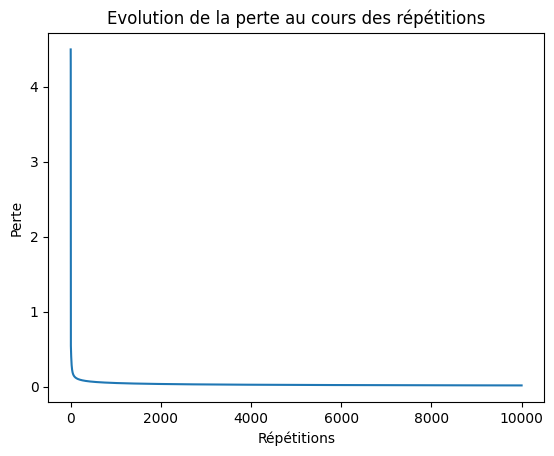

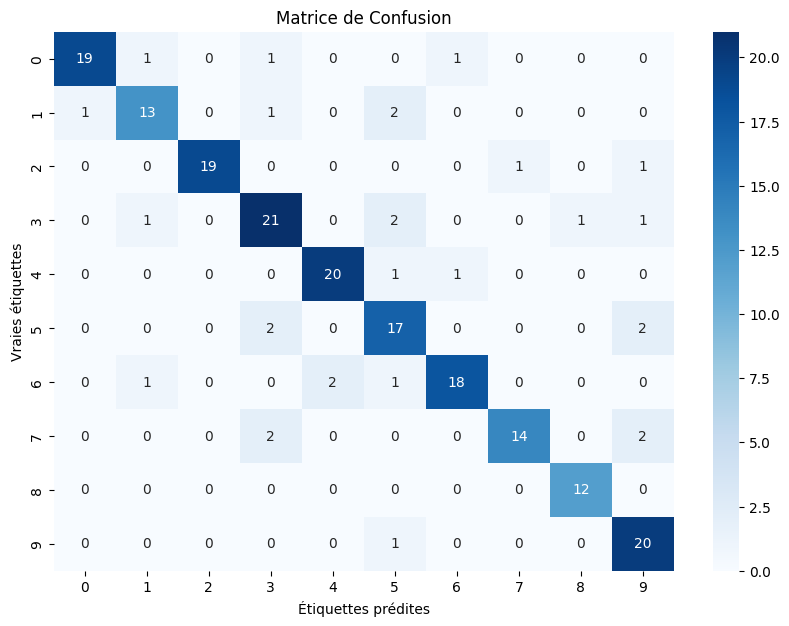

In [4]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

n = 100 #nombres d'entrées
k = 10 #nombres de sorties

X = np.random.rand(n, 1)  
print(X)
Y = np.random.rand(k, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivate(x):
    return sigmoid(x) * (1 - sigmoid(x))

def Z(X, W, b):
    return np.dot(W, X) + b

def neurones(nombre_entrees, nombre_sorties):
    W = np.random.rand(nombre_sorties, nombre_entrees)
    B = np.random.rand(nombre_sorties, 1)
    return W, B


def apprentissage(X, Y, W, B, learning_rate, rep):
    loss_history = []
    precision_history = []
    for rep in range(rep):
        # Forward pass
        Z = np.dot(W, X) + B
        A = sigmoid(Z)
        
        # Compute the error
        dZ = A - Y
        loss = np.mean(0.5 * np.sum(dZ ** 2, axis=0))  # Quadratic cost function
        loss_history.append(loss)
        
        # Backward pass (Gradient Descent)
        dW = np.dot(dZ, X.T) / n
        dB = np.sum(dZ, axis=1, keepdims=True) / n
        
        # Update weights and biases
        W -= learning_rate * dW
        B -= learning_rate * dB
        
        if rep % 100 == 0:
            precision = calculer_precision(A, Y)
            precision_history.append(precision)
            print(f"rep: {rep}, Loss: {loss}, Precision: {precision}")

    return W, B, loss_history, precision_history

def calculer_precision(A, Y):
    predictions = np.argmax(A, axis=0)
    true_classes = np.argmax(Y, axis=0)
    precision = np.mean(predictions == true_classes)
    return precision

def charger_images(base_path, test_size=0.2):
    images = []
    labels = []
    
    for chiffre in range(10):  # Pour chaque chiffre de 0 à 9
        dossier_chiffre = os.path.join(base_path, str(chiffre))  # Chemin du dossier pour le chiffre
        for i in range(101):  # Pour chaque image de 0.jpg à 100.jpg
            image_path = os.path.join(dossier_chiffre, f"{i}.jpg")
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    img_array = np.asarray(img)
                    img_array = img_array / 255.0  # Normalisation
                    images.append(img_array.flatten())  # Aplatir l'image et ajouter au tableau
                    labels.append(chiffre)  # Ajouter l'étiquette correspondant au chiffre
    
    images = np.array(images)
    labels = np.array(labels)

    # Mélanger les données
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]
    
    # Diviser les données en ensembles d'entraînement et de test
    split_idx = int(images.shape[0] * (1 - test_size))
    X_train, X_test = images[:split_idx], images[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]
    
    return X_train, X_test, y_train, y_test


chemin_dataset = "C:/Users/cedri/Documents/Machine_learning/chiffres/10x10 dataset/"
X_train, X_test, y_train, y_test = charger_images(chemin_dataset, test_size=0.2)

# Convertir les étiquettes en vecteurs one-hot
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels].T

Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)
X_train = X_train
X_test = X_test

W, B = neurones(n, k)


learning_rate = 0.1  # Taux d'apprentissage
epochs = 10000
W, B, loss_history, precision_history = apprentissage(X_train.T, Y_train, W, B, learning_rate, epochs)

# Tracer l'évolution de la perte
plt.plot(loss_history)
plt.title('Evolution de la perte au cours des répétitions')
plt.xlabel('Répétitions')
plt.ylabel('Perte')
plt.show()


def plot_confusion_matrix(Y_true, Y_pred, classes):
    cm = confusion_matrix(Y_true, Y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title('Matrice de Confusion')
    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Étiquettes prédites')
    plt.show()

Y_pred = np.argmax(sigmoid(Z(X_test.T, W, B)), axis=0)
Y_true = np.argmax(Y_test, axis=0)
classes = [str(i) for i in range(k)]
plot_confusion_matrix(Y_true, Y_pred, classes)






Epoch 1/10000, Loss: 0.1111544755756843
Epoch 101/10000, Loss: 0.04519586192084149
Epoch 201/10000, Loss: 0.04352083378813325
Epoch 301/10000, Loss: 0.040926730535610086
Epoch 401/10000, Loss: 0.03742204794761055
Epoch 501/10000, Loss: 0.033557126815151106
Epoch 601/10000, Loss: 0.02981062280165678
Epoch 701/10000, Loss: 0.026482484061380207
Epoch 801/10000, Loss: 0.02361990213314407
Epoch 901/10000, Loss: 0.021223642920018052
Epoch 1001/10000, Loss: 0.019227847618381984
Epoch 1101/10000, Loss: 0.017570026475937143
Epoch 1201/10000, Loss: 0.016188528054954042
Epoch 1301/10000, Loss: 0.015024408467476666
Epoch 1401/10000, Loss: 0.0140389893360774
Epoch 1501/10000, Loss: 0.013193050027788231
Epoch 1601/10000, Loss: 0.012456113473947147
Epoch 1701/10000, Loss: 0.011809620011175791
Epoch 1801/10000, Loss: 0.011237461753152284
Epoch 1901/10000, Loss: 0.010727907366439332
Epoch 2001/10000, Loss: 0.01027029837079227
Epoch 2101/10000, Loss: 0.009853621666188995
Epoch 2201/10000, Loss: 0.009472

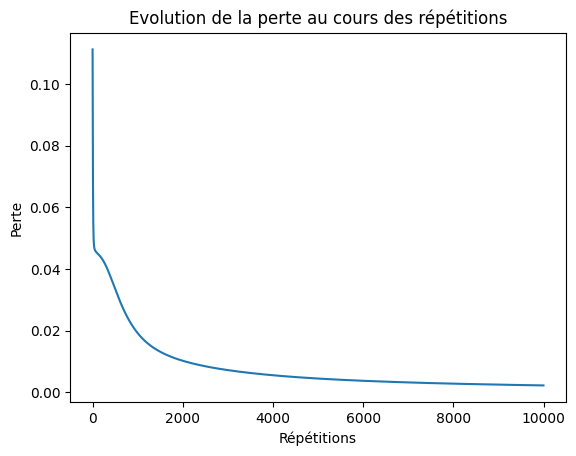

Précision du modèle sur l'ensemble de test : 84.16%
Précision pour le chiffre 0: 80.77%
Précision pour le chiffre 1: 88.89%
Précision pour le chiffre 2: 80.00%
Précision pour le chiffre 3: 77.27%
Précision pour le chiffre 4: 94.74%
Précision pour le chiffre 5: 76.19%
Précision pour le chiffre 6: 100.00%
Précision pour le chiffre 7: 92.00%
Précision pour le chiffre 8: 75.00%
Précision pour le chiffre 9: 77.27%


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
class CoucheNeuronale:
    def __init__(self, nombre_entrees, nombre_neurones, activation):
        if activation == 'relu':
            # Initialisation de He
            self.W = np.random.randn(nombre_neurones, nombre_entrees) * np.sqrt(2. / nombre_entrees)
        else:
            # Initialisation standard pour sigmoid
            self.W = np.random.randn(nombre_neurones, nombre_entrees) * np.sqrt(1. / nombre_entrees)
        self.B = np.zeros((nombre_neurones, 1))
        self.activation = activation

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.Z = np.dot(self.W, X) + self.B
        if self.activation == 'sigmoid':
            self.A = self.sigmoid(self.Z)
        elif self.activation == 'relu':
            self.A = self.relu(self.Z)
        return self.A

    def backward(self, X, dA_prec, learning_rate):
        m = X.shape[1]
        if self.activation == 'sigmoid':
            dZ = dA_prec * self.sigmoid(self.Z) * (1 - self.sigmoid(self.Z))
        elif self.activation == 'relu':
            dZ = dA_prec * (self.Z > 0).astype(int)

        dW = np.dot(dZ, X.T) / m
        dB = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prec = np.dot(self.W.T, dZ)  # Gradient par rapport à l'entrée

        self.W -= learning_rate * dW
        self.B -= learning_rate * dB

        return dA_prec

def charger_images(base_path, test_size=0.2):
    images = []
    labels = []
    
    for chiffre in range(10):  # Pour chaque chiffre de 0 à 9
        dossier_chiffre = os.path.join(base_path, str(chiffre))  # Chemin du dossier pour le chiffre
        for i in range(101):  # Pour chaque image de 0.jpg à 100.jpg
            image_path = os.path.join(dossier_chiffre, f"{i}.jpg")
            if os.path.exists(image_path):
                with Image.open(image_path) as img:
                    img_array = np.asarray(img)
                    img_array = img_array / 255.0  # Normalisation
                    images.append(img_array.flatten())  # Aplatir l'image et ajouter au tableau
                    labels.append(chiffre)  # Ajouter l'étiquette correspondant au chiffre
    
    images = np.array(images)
    labels = np.array(labels)

    # Mélanger les données
    indices = np.arange(images.shape[0])
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]
    
    # Diviser les données en ensembles d'entraînement et de test
    split_idx = int(images.shape[0] * (1 - test_size))
    X_train, X_test = images[:split_idx], images[split_idx:]
    y_train, y_test = labels[:split_idx], labels[split_idx:]
    
    return X_train, X_test, y_train, y_test


chemin_dataset = "C:/Users/cedri/Documents/Machine_learning/chiffres/10x10 dataset/"
X_train, X_test, y_train, y_test = charger_images(chemin_dataset, test_size=0.2)

# Convertir les étiquettes en vecteurs one-hot
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels].T

Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)
X_train = X_train
X_test = X_test

def entrainer_reseau(X_train, Y_train, couche1, couche2, epochs, learning_rate):
    loss_history = []
    
    for epoch in range(epochs):
        # Propagation avant
        A1 = couche1.forward(X_train)
        A2 = couche2.forward(A1)
        
        # Calcul de la perte (erreur quadratique moyenne)
        loss = np.mean(0.5 * (A2 - Y_train) ** 2)
        loss_history.append(loss)
        
        # Rétropropagation
        # Note : dA2 pour la dernière couche se calcule différemment selon la fonction de perte
        dA2 = A2 - Y_train
        dA1 = couche2.backward(A1, dA2, learning_rate)
        dA0 = couche1.backward(X_train, dA1, learning_rate)  # dA0 n'est pas utilisé ici
        
        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss}")
    
    return loss_history
couche1 = CoucheNeuronale(100, 32, 'relu')
couche2 = CoucheNeuronale(32, 10, 'sigmoid')
loss_history=entrainer_reseau(X_train.T, Y_train, couche1, couche2, epochs=10000, learning_rate=0.1)

plt.plot(loss_history)
plt.title('Evolution de la perte au cours des répétitions')
plt.xlabel('Répétitions')
plt.ylabel('Perte')
plt.show()

def evaluer_modele(X_test, Y_test, couche1, couche2):
    # Propagation avant sur l'ensemble de test
    A1 = couche1.forward(X_test)
    A2 = couche2.forward(A1)
    
    # Prédictions : récupérer l'indice de la plus grande probabilité pour chaque exemple
    predictions = np.argmax(A2, axis=0)
    labels_verites = np.argmax(Y_test, axis=0)  # Assurez-vous que Y_test est dans le format correct
    
    # Calcul de la précision
    precision = np.mean(predictions == labels_verites)
    return precision

# Évaluation de la précision du modèle sur l'ensemble de test
precision = evaluer_modele(X_test.T, Y_test, couche1, couche2)
print(f"Précision du modèle sur l'ensemble de test : {precision * 100:.2f}%")

def precision_par_chiffre(X_test, Y_test, couche1, couche2):
    A1 = couche1.forward(X_test)
    A2 = couche2.forward(A1)
    
    predictions = np.argmax(A2, axis=0)
    labels_verites = np.argmax(Y_test, axis=0)
    
    precision_par_classe = np.zeros(10)  # Pour stocker la précision de chaque classe
    
    for classe in range(10):  # Pour chaque classe de chiffre de 0 à 9
        indices_classe = labels_verites == classe  # Trouver où les vraies étiquettes sont égales à la classe
        predictions_classe = predictions[indices_classe]  # Filtrer les prédictions pour ces indices
        labels_verites_classe = labels_verites[indices_classe]  # Filtrer les vraies étiquettes pour ces indices
        
        # Calculer la précision pour cette classe
        precision_classe = np.mean(predictions_classe == labels_verites_classe)
        precision_par_classe[classe] = precision_classe
    
    return precision_par_classe

# Calculer la précision par chiffre sur l'ensemble de test
precision_chiffre = precision_par_chiffre(X_test.T, Y_test, couche1, couche2)

# Afficher la précision pour chaque chiffre
for chiffre in range(10):
    print(f"Précision pour le chiffre {chiffre}: {precision_chiffre[chiffre] * 100:.2f}%")


X_train shape: (808, 100)
Y_train shape: (10, 808)
X_test shape: (202, 100)
Y_test shape: (10, 202)
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2329 - loss: 2.1753 - val_accuracy: 0.6728 - val_loss: 1.5993
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7416 - loss: 1.3833 - val_accuracy: 0.8086 - val_loss: 1.1082
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8471 - loss: 0.8792 - val_accuracy: 0.8395 - val_loss: 0.8347
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8479 - loss: 0.6621 - val_accuracy: 0.8519 - val_loss: 0.7405
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8818 - loss: 0.4894 - val_accuracy: 0.8519 - val_loss: 0.6472
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.4070 - val_accuracy: 0.8519 - val_loss: 0.6207
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9414 - loss: 0.3265 - val_accuracy: 0.8580 - val_loss: 0.5590
Epoch 8/10
21/21 

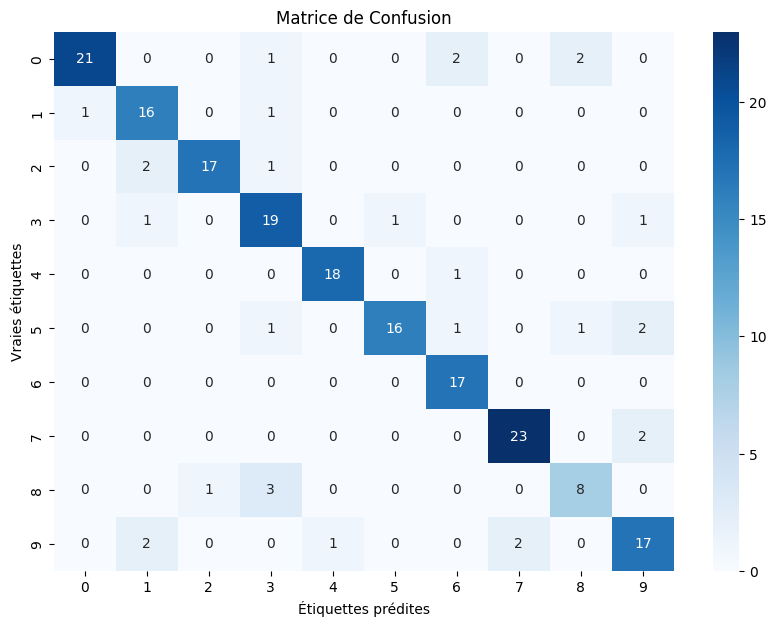

In [22]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vérification des dimensions
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

# 1. Assurer que Y_train et Y_test sont correctement formatés pour TensorFlow
# Si Y_train et Y_test ne sont pas déjà en one-hot encoding, utilisez:
Y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
Y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# 2. Construction du modèle
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Pour réduire le surajustement
    tf.keras.layers.Dense(10, activation='softmax')  # Pour la classification de 10 classes
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3. Entraînement du modèle
history = model.fit(X_train, Y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)

# 4. Évaluation sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, Y_test_one_hot, verbose=2)
print('\nPrécision sur le test:', test_acc)

# Matrice de confusion
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_true = np.argmax(Y_test_one_hot, axis=1)
cm = confusion_matrix(Y_true, Y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Matrice de Confusion')
plt.ylabel('Vraies étiquettes')
plt.xlabel('Étiquettes prédites')
plt.show()
